In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt

Загрузка данных из csv data

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Гистограммы относительной и фактической частоты встречаемости для 20 наиболее популярных товаров

Относительная частота

<AxesSubplot:>

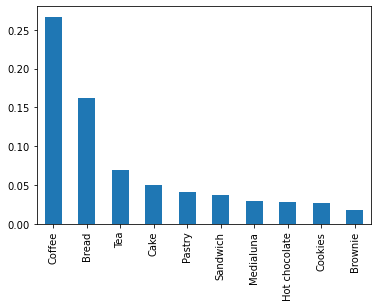

In [5]:
df.stack().value_counts(normalize=True).sort_values(ascending=False)[:10].plot(kind='bar')

Фактическая частота

<AxesSubplot:>

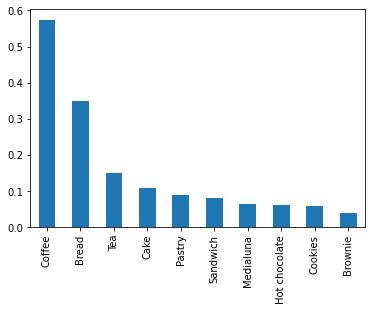

In [6]:
df.stack().value_counts().sort_values(ascending=False)[:10].apply(lambda item: item / df.shape[0]).plot(kind='bar')

Сформируем список транзакций, выведем первый элемент и первый список

In [7]:
transations = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transations.append(row)

In [8]:
transations[0][0]

'Scandinavian'

In [9]:
transations[0]

['Scandinavian', 'Scandinavian']

Воспользуемся библиотекой apriori_python

In [10]:
!pip3 install apriori-python

In [11]:
from apriori_python import apriori

In [12]:
t = []
start = time.perf_counter()

t1, rules = apriori(transations, minSup=0.05, minConf = 0.1)
time1 = time.perf_counter() - start
t.append(time1)

In [13]:
rules

[[{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.2751937984496124],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834]]

Воспользуемся библиотекой apyori

In [14]:
!pip3 install apyori

In [15]:
from apyori import apriori as apy_apriori

In [16]:
start = time.perf_counter()

rules = apy_apriori(transactions=transations,
min_support=0.05, min_confidence=0.1,
min_lift=1.0001)
results = list(rules)
time2 = (time.perf_counter() - start)
t.append(time2)

In [17]:
results

[RelationRecord(items=frozenset({'Coffee', 'Cake'}), support=0.05435466946484785, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cake'}), items_add=frozenset({'Coffee'}), confidence=0.5269582909460834, lift=1.109079618532724), OrderedStatistic(items_base=frozenset({'Coffee'}), items_add=frozenset({'Cake'}), confidence=0.11439929328621908, lift=1.109079618532724)])]

In [18]:
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Support: {0}; Confidence: {1}; Lift: {2};". format(result[1], subset[2], subset[3]))
        print()

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785; Confidence: 0.5269582909460834; Lift: 1.109079618532724;

frozenset({'Coffee'}) frozenset({'Cake'})
Support: 0.05435466946484785; Confidence: 0.11439929328621908; Lift: 1.109079618532724;



Воспользуемся библиотекой efficient_apriori

In [19]:
!pip3 install efficient-apriori

In [20]:
from efficient_apriori import apriori as eff_apriori

In [21]:
start = time.perf_counter()
itemsets, rules = eff_apriori(transations, min_support = 0.05, min_confidence = 0.1)
time3 = time.perf_counter() - start
t.append(time3)

In [22]:
for i in range(len(rules)):
    print(rules[i])

{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)


Применим алгоритм FP-Growth

In [23]:
!pip3 install fpgrowth-py

In [24]:
from fpgrowth_py import fpgrowth

In [25]:
start = time.perf_counter()
itemsets, rules = fpgrowth(transations, minSupRatio=0.05, minConf=0.1)
time4 = time.perf_counter() - start
t.append(time4)

In [26]:
for i in range(len(rules)):
    print(rules[i])

[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Coffee'}, {'Cake'}, 0.11439929328621908]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Coffee'}, {'Tea'}, 0.10424028268551237]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]


Сравним время выполнения наших алгоритмов

Время выполнения apriori:  0.6001147000006313 

Время выполнения apriori 2:  0.02723150000019814 

Время выполнения efficient_apriori:  0.02911110000059125 

Время выполнения fpgrowth:  0.1909446999998181 



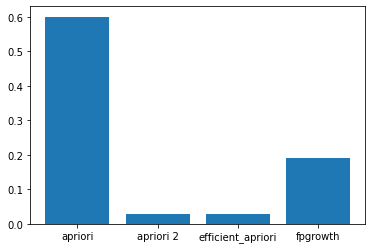

In [27]:
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori','apriori 2','efficient_apriori','fpgrowth'],t)
plt.show()